In [1]:
#Dataframe
import yaml
import pandas as pd
import numpy as np

pd.options.display.max_seq_items = 3000000
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from ipywidgets import interact, interact_manual

#Cleaning 
import re

In [2]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "datas_reste_non_num_a_traiter2.csv", nrows = 1000000)
    print(f"data set shape is {data.shape}")

Reading dataset ...
data set shape is (1000000, 166)


In [3]:
data.describe()

,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,energy-kj_100g,energy-kcal_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,fruits-vegetables-rate_100g
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,75.039003,1.487512,9.583464,3.676487,62.389284,323.830751,1.554554,0.487167,992.779033,260.308431,...,9.583474,17.808615,54.841267,1.475000e+00,0.088350,0.048576,1.518440,0.027965,0.011621,36.338480
std,74.657076,1.970279,6.056827,0.764430,17.546169,513.316767,4.132578,0.201459,477.600535,177.559877,...,6.056837,0.959321,11.118884,3.108626e-15,0.173802,0.755113,1.280557,0.075117,0.003835,9.910024
min,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,...,-15.000000,13.000000,14.000000,1.475000e+00,0.008000,0.000000,0.400000,0.002000,0.000800,25.000000
25%,42.000000,1.000000,9.000000,4.000000,58.000000,250.000000,1.000000,0.362500,957.000000,105.000000,...,9.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000017,1.200000,0.028000,0.011000,25.000000
50%,57.000000,1.000000,10.000000,4.000000,71.000000,250.000000,1.000000,0.462500,957.000000,258.800000,...,10.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000056,1.200000,0.028000,0.011000,45.000000
75%,57.000000,1.000000,11.000000,4.000000,71.000000,300.000000,1.000000,0.575000,957.000000,386.000000,...,11.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000056,1.200000,0.028000,0.011000,45.000000
max,5000.000000,15.000000,40.000000,4.000000,125.000000,80000.000000,461.000000,1.100000,3700.000000,900.000000,...,40.000000,18.000000,59.350000,1.475000e+00,4.550000,11.800000,7.300000,75.000000,0.030000,45.000000


## Data Cleaning

In [4]:
## Changing format of object and float64 columns

new_dtypes = {}

# object -> category (if nb unique < half total nb of rows and not XXX_100g)
for col in data.columns.values:
    if data[col].dtype == 'object' :
      if len(data[col].unique()) / len(data[col]) < 0.5:
        new_dtypes[col] = 'category'
      else:
        new_dtypes[col] = 'object'

# float64 -> float32
for col in data.columns.values:
    if data[col].dtype == 'float64':
      if data[col].notna().sum()!=0: # 1% sample columns happening to be all null 
        new_dtypes[col] = 'float32'

# int64 -> int8
for col in data.columns.values:
    if data[col].dtype == 'int64':
        new_dtypes[col] = 'int8'
        
print(new_dtypes)

{'code': 'object', 'url': 'object', 'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'quantity': 'category', 'packaging_en': 'category', 'packaging_text': 'category', 'brands': 'category', 'categories_en': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'first_packaging_code_geo': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'ingredients_analysis_tags': 'category', 'allergens': 'category', 'traces_en': 'category', 'serving_size': 'category', 'no_nutrition_data': 'category', 'additives_en': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'food_groups_en': 'category', 'states_en': 'category', 'brand_owner': 'category', 'ecoscore_grade': 'category', 'nutrient_levels_tags': 'category', 'owner': 'category', 'data_

In [5]:
## Forcing XXX_100g and nutriscore columns to 'float32' and nova to 'object'

X_100g_cols = data.columns[data.columns.str.contains('_100g')]
for col in X_100g_cols:
    new_dtypes[col] = 'float32'

In [6]:
desc = data.describe(include='all')

In [7]:
# Checking columns in df

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging_en | packaging_text | brands | categories_en | origins_en | manufacturing_places | 
labels_en | emb_codes | first_packaging_code_geo | cities_tags | purchase_places | stores | 
countries_en | ingredients_text | ingredients_analysis_tags | allergens | traces_en | serving_size | 
serving_quantity | no_nutrition_data | additives_n | additives_en | nutriscore_score | nutriscore_grade | 
nova_group | pnns_groups_1 | pnns_groups_2 | food_groups_en | states_en | brand_owner | 
ecoscore_score | ecoscore_grade | nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | 
unique_scans_n | popularity_tags | completeness | main_category_en | image_small_url | image_ingredients_small_url | 
image_nutrition_small_url | energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | 
saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-

## Features Selection

1.1 Empty Columns 

In [8]:


# Checking nb of not null values in the columns

nb_not_null = pd.DataFrame((~data.isna()).sum(axis =0), columns=['nb'])
nb_not_null.sort_values(by=['nb'], axis=0, ascending=True, inplace=True)
nb_not_null.T.head(150)



,abbreviated_product_name,packaging_text,no_nutrition_data,owner,origins_en,data_quality_errors_tags,first_packaging_code_geo,cities_tags,manufacturing_places,generic_name,...,maltose_100g,polyunsaturated-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,omega-3-fat_100g,fruits-vegetables-rate_100g
nb,6039,10878,16817,33713,53620,53682,58494,62920,69689,73945,...,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [9]:
# Displaying a table with bins
mask = pd.cut(nb_not_null['nb'], [-1,0,5,10,100,300,10000,2000000]) # 
mask.value_counts(normalize=False, sort=False)



(-1, 0]               0
(0, 5]                0
(5, 10]               0
(10, 100]             0
(100, 300]            0
(300, 10000]          1
(10000, 2000000]    165
Name: nb, dtype: int64

In [10]:
# Changing the name of some of the columns

data.rename(columns={'nutriscore_score': 'nutriscore',
                   'nutriscore_grade': 'nutrigrade',
                    'traces_en' : 'traces',
                     'labels_en' : 'labels',
                   'pnns_groups_1': 'pnns1',
                   'pnns_groups_2': 'pnns2',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)



In [11]:
# Changing the name of some of the columns

data.rename(columns={'countries_en': 'countries',
                     'packaging_en' : 'packaging',
                   'additives_en': 'additives',
                   'main_category_en': 'main_category',
                   'categories_en': 'categories',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)

## Redundancy of features 

In [12]:


# Comparing filled values in two columns
''' returns indices where both are filled, or first only, or second, or none'''

def comp_df (df, col1, col2, print_option):
  m_both = (~df[[col1,col2]].isna()).sum(axis=1)==2 # mask for both cells filled
  m_one = (~df[[col1,col2]].isna()).sum(axis=1)==1 # mask for only one cell filled
  m_col1 = m_one & ~df[col1].isna() # mask for only col1 cell filled
  m_col2 = m_one & ~df[col2].isna() # mask for only col2 cell filled
  mnone = ~m_one & ~m_both
  ind_both = df.index[m_both].to_list()
  ind_col1 = df.index[m_col1].to_list()
  ind_col2 = df.index[m_col2].to_list()
  ind_none = df.index[mnone].to_list()
  if print_option :
    print("nb rows both filled: ", len(ind_both))
    print("nb rows with only", col1, "filled: ", len(ind_col1))
    print("nb rows with only", col2, "filled: ", len(ind_col2))
    print("nb rows not filled: ", len(ind_none))
  else:
    pass
  return(ind_both, ind_col1, ind_col2, ind_none)



In [13]:


# Printing result of comparison in each case:

li_col = ['packaging']
for c in li_col:
  c1 = c
  c2 = c+'_text'
  print('COLUMN', c,':')
  t_ind = comp_df(data, c1, c2, True)
  data.loc[t_ind[1], [c1,c2]] = np.nan



COLUMN packaging :
nb rows both filled:  10878
nb rows with only packaging filled:  989122
nb rows with only packaging_text filled:  0
nb rows not filled:  0


In [14]:
data.filter( like = 'packaging')

,packaging,packaging_text,first_packaging_code_geo
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
999995,NaN,NaN,NaN
999996,NaN,NaN,NaN
999997,NaN,NaN,NaN
999998,NaN,NaN,NaN


In [15]:
data.filter(like = 'brands')

,brands
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
999995,NaN
999996,NaN
999997,NaN
999998,adler


In [16]:
data.drop(columns = 'packaging_text',inplace = True)

In [17]:
# Checking the remaining columns

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging | brands | categories | origins_en | manufacturing_places | labels | 
emb_codes | first_packaging_code_geo | cities_tags | purchase_places | stores | countries | 
ingredients_text | ingredients_analysis_tags | allergens | traces | serving_size | serving_quantity | 
no_nutrition_data | additives_n | additives | nutriscore | nutrigrade | nova_group | 
pnns1 | pnns2 | food_groups_en | states_en | brand_owner | ecoscore_score | 
ecoscore_grade | nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | unique_scans_n | 
popularity_tags | completeness | main_category | image_small_url | image_ingredients_small_url | image_nutrition_small_url | 
energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | saturated-fat_100g | 
butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-acid_100g | lauric-acid_100g | myristic-acid_100g | 
palmitic-acid

## Categorial Features

#### 2.0 Missing value

In [18]:

cols = ['brands', 'packaging', 'countries', 'labels', 'traces', 'additives',
        'allergens', 'main_category', 'categories','pnns2', 'pnns1']


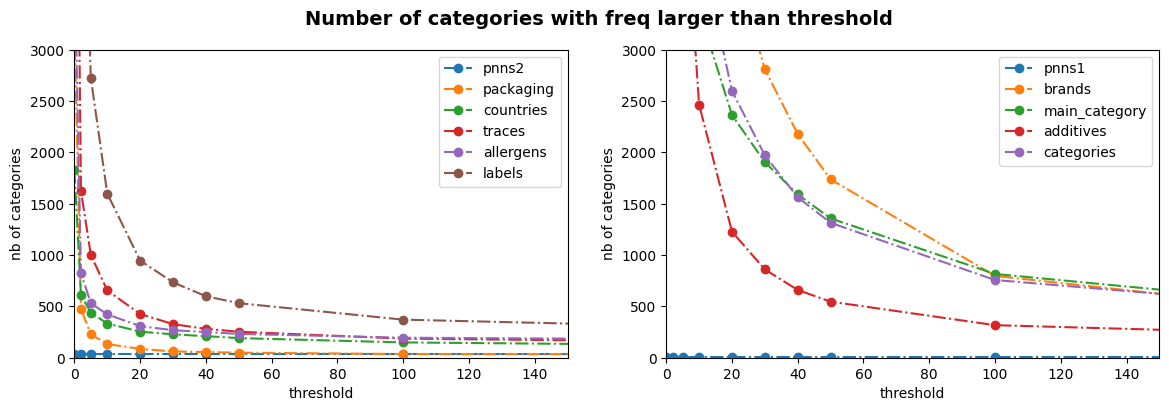

In [19]:
# Checking lower number of occurences in cat columns

fig, axs = plt.subplots(1,2)
thresh = [0,2,5,10,20,30,40,50,100,250,500,1000,5000]

for i, c in enumerate(['pnns2', 'packaging', 'countries',\
                      'traces',  'allergens', 'labels']):
    ser = data[c].value_counts()
    axs[0].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')
    
for i, c in enumerate(['pnns1', 'brands','main_category','additives',\
                      'categories']):
    ser = data[c].value_counts()
    axs[1].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')

[(ax.set_xlabel('threshold'),ax.set_ylabel('nb of categories')) for ax in axs];
[ax.set(xlim=(0,150), ylim=(0,3000)) for ax in axs];
[ax.legend() for ax in axs];

fig.suptitle('Number of categories with freq larger than threshold',
             fontweight='bold', fontsize=14)
plt.gcf().set_size_inches(14,4)
plt.savefig('image/C_2_0_cat_nb_vs_freq_thr.png', dpi=400);
plt.show()

In [20]:

def print_comp_info(col=li_col):
  c1 = col
  c2 = c1+'_tags'
  # Comparing content of 2 columns, print info and returns indexes 
  t_ind = comp_df(data, c1, c2, True)
  # Displaying a random sample of cells:
  '''- when col1 only is filled
  - when col2 only is filled
  - when both columns are filled'''
  display_side_by_side(df.loc[t_ind[1],[c1, c2]]\
                       .sample(5 if len(t_ind[1])>5 else len(t_ind[1])),
                      df.loc[t_ind[2], [c1, c2]]\
                       .sample(5 if len(t_ind[2])>5 else len(t_ind[2])),
                      df.loc[t_ind[0], [c1, c2]]\
                       .sample(5 if len(t_ind[0])>5 else len(t_ind[0])))



### 2.1 Features with list

In [21]:


# Replace - by ' ' in  columns
for c in cols:
    data[c] = data[c].replace([r'[-]'], [' '], regex=True)

In [22]:


# Printing columns containing lists or not

for c in cols:
    n_lists = data[c].str.contains(',').sum()
    if data[c].str.contains(',').sum():
        print(c.upper()+': ' + str(n_lists) + ' lists')
    else:
        print(c + ': - no list - ')



BRANDS: 71360 lists
PACKAGING: 5813 lists
COUNTRIES: 27459 lists
LABELS: 174606 lists
TRACES: 52080 lists
ADDITIVES: 215678 lists
ALLERGENS: 57280 lists
main_category: - no list - 
CATEGORIES: 475180 lists
pnns2: - no list - 
pnns1: - no list - 


In [23]:


# Splitting categories in 2 groups: containing lists, or not

multi_cat_cols = ['brands', 'packaging', 'countries','labels',
                  'traces','additives','allergens','categories']

cat_cols = ['main_category', 'pnns1', 'pnns2']




### Splitting, extracting main, dropping less frequent values

categories with lists

In [24]:


# Setting to nan categories with less than freq 15 | returning tuples for others  

def filter_main_categories(ser,n):
    ser_m = ser
    flat_values = pd.Series([item for sublist in ser.str.split(',')\
                            for item in sublist])
    cat_occ = flat_values.value_counts()
    to_keep = cat_occ[cat_occ>n].index
    ser_m = ser_m.apply(lambda x: tuple([s.strip() for s in x.split(',')\
                                            if s.strip() in to_keep]))
    return ser_m



categories without lists

In [25]:
n = 15

In [26]:


# Printing number of unique values of category columns

print('Number of categories: ',[(cat+' ('+str(data[cat].nunique())+') ') for cat in cols])



Number of categories:  ['brands (89584) ', 'packaging (3215) ', 'countries (1767) ', 'labels (41364) ', 'traces (7497) ', 'additives (69293) ', 'allergens (3852) ', 'main_category (19681) ', 'categories (52471) ', 'pnns2 (40) ', 'pnns1 (11) ']


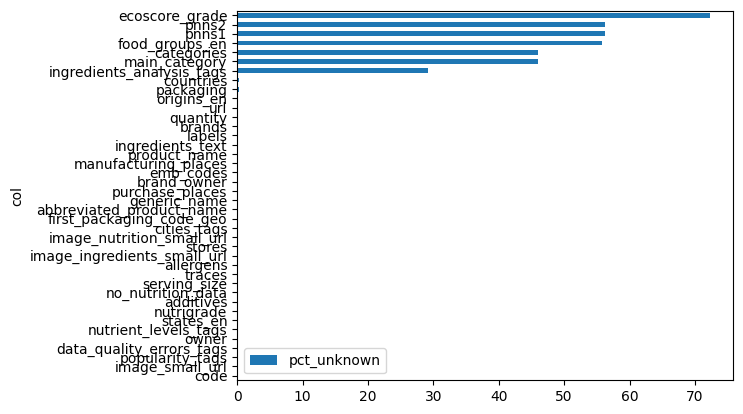

In [27]:
# Percentage of 'unknown' in categorical data

tot = data.shape[0]
ser = pd.DataFrame([[c, data[c].str.contains('unknown').sum()*100/tot] \
                 for c in data.select_dtypes('object').columns],
                 columns=['col', 'pct_unknown']).set_index('col')
ser.sort_values('pct_unknown').plot.barh()
plt.savefig('image/C_2_0_unknown_cat_values.png', dpi=400);
plt.show()


### 2.1 'product_name' column

In [28]:


# Replacing invalid names (1 or 0 characters) with np.NaN


data.loc[data[data['product_name'].str.len()<2].index,'product_name'] = np.nan


### 2.2 'quantity' column

In [29]:
# Changing the type of quantity column from 'category' to 'quantity'

data['quantity'] = data['quantity'].astype('object')

In [30]:
# Function selecting the most relevant tuple (num,unit) in the list
# by order of priority : unit in li_prio1, then in li_prio2

def sel_gr(li, li_prio1, li_prio2):
  res = 0
  nums, units = li
  tab_t_u = []
  ind = np.nan
  for i in units:
    if  i in li_prio1:
      tab_t_u.append(2)
    elif  i in li_prio2:
      tab_t_u.append(1)
    else:
      tab_t_u.append(0) if i!='' else tab_t_u.append(np.nan)
  i_tab1 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==2] # indexes of all volumes (prio1)
  i_tab2 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==1] # indexes of all masses (prio2)
  i_tab0 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==0] # indexes of all others (prio3)
  if len(i_tab1)>0: # prio1 (vol)
    ind = i_tab1[np.argmax([nums[i] for i in i_tab1])]
  elif len(i_tab2)>0: # prio2 (mass)
    ind = i_tab2[np.argmax([nums[i] for i in i_tab2])]
  else:
    ind = i_tab0[np.argmax([nums[i] for i in i_tab0])] if len(i_tab0)>0 else np.nan
  return(nums[ind], units[ind]) if ind is not np.nan else (np.nan, np.nan)

In [31]:

# Creating a new database with 'quantity' data (wo null, same index)

df_q = data['quantity'].dropna().to_frame()
print("Nb of notna values in 'quantity': {} on {}, i.e. {:.1f}%"\
           .format(df_q.shape[0], data.shape[0],df_q.shape[0]*100/data.shape[0]))
display(df_q.head(15).T)



Nb of notna values in 'quantity': 271158 on 1000000, i.e. 27.1%


,6,11,17,37,41,106,109,110,214,215,216,241,246,248,250
quantity,100g,80 g,125 g,1 l,1,250 ml,230g,100 g,500g,250g,2l,245 g,220 g,300g,0.980 kg


In [32]:
'''Cleaning 'quantity' column routines''' 

# To ensure safe execution of function 'float'
def safe_exe(def_val, function, *args):
    try: return function(*args)
    except: return def_val

# Conversion of string in float if possible, else 0 (accepts 'n1 x n2' string)
def conv_float(my_str):
  idx = 0
  if 'x' in my_str:
    idx = my_str.find('x')
    n1 = safe_exe(0, float, my_str[:idx])
    n2 = safe_exe(0, float, my_str[idx+1:])
    return n1*n2
  else:
    return safe_exe(0, float, my_str)

# Splits string in a list of tuples (number, associated unit)
def num_units(my_str):
  my_str = my_str.lower().strip()
  regex = r'([0-9.,x ]*)\s*([^()0-9 !,\-±=\*\+/.-\?\[\]]*\s*)'
  res = re.findall(regex, my_str)
  res.remove(('', ''))
  num = [conv_float(gr[0].replace(' ','').replace(',','.')) for gr in res]
  unit = [gr[1].strip()  for gr in res]
  res=list(zip(num,unit))
  return num, unit

In [33]:
# Classifying main relevant units in 'mass' and 'volume' units
li_u_mass = ['g', 'kg', 'gr', 'grammes', 'grs','st', 'mg', 'gramm', 'lb','gram',
             'grams', 'gramos', 'lbs', 'gm', 'lt', 'lts','gramme', 'kilo','公克',
             'grammi', 'kgs', 'kgr', 'gms', 'g-', 'grms','pound', 'pounds',
             'ounces','ounce','grm', 'grames','غرام', 'جرام','غ', 'غم','جم',
             'g℮', 'г', 'кг', '克', 'грамм', 'גרם','kilogramm','gramas', 'γρ',
             'kilogrammae','livres','grame', 'kilos'] 
li_u_vol = ['ml','dl','l','cl', 'oz', 'litre', 'fl', 'litres', 'liter','litro',
            'litri','litr',  'ltr', 'lt', 'lts', 'gallon','half-gallon',
            'litros','litroe', 'liters', 'cc', 'kl', 'pint','pints', 'gal',
            'mls', 'centilitres', 'لتر','مل','ل','ليتر', 'มล', 'ลิตร', 'мл', 'л',
            'litrè', 'milliliter','millilitre', 'литр', 'литра', 'mml',
            'מ״ל','millilitres','λίτρο', 'mĺ', 'cm', 'cm³' ]

In [34]:
# Splitting numerical and unit values in two new columns
df_q['analysis'] = df_q['quantity'].apply(num_units)
df_q[['num_gr','unit_gr']] = pd.DataFrame(df_q['analysis'].tolist(),
                                          index=df_q['analysis'].index)
# Selecting the main (num, unit) as the most relevant tuple from 'analysis'
# -> first mass, then volume
my_fun = lambda x: sel_gr(x, li_u_vol, li_u_mass)
df_q[['num','unit']] = pd.DataFrame(df_q['analysis'].apply(my_fun).tolist(),
                                    index=df_q['analysis'].index)
df_q.head(5).T



,6,11,17,37,41
quantity,100g,80 g,125 g,1 l,1
analysis,"([100.0], [g])","([80.0], [g])","([125.0], [g])","([1.0], [l])","([1.0], [])"
num_gr,[100.0],[80.0],[125.0],[1.0],[1.0]
unit_gr,[g],[g],[g],[l],[]
num,100.0,80.0,125.0,1.0,NaN
unit,g,g,g,l,NaN


In [35]:
# Creating a new column with type of the main unit
d_mass_vol = dict([(u,'mass') if u in li_u_mass else\
                  (u,'vol')  if u in li_u_vol else\
                  (u,'other') for u in df_q['unit'].unique()])
df_q['unit_type'] = df_q['unit'].dropna().map(d_mass_vol)

In [36]:
# Dropping rows where unit or num is null 
df_q = df_q.dropna(subset=['unit', 'num'])
# Dropping rows where num is zero, negative or greater than 10000
df_q = df_q[df_q['num'].between(0.0001,10000)]

In [37]:
# Merging df_q with df, reordering the columns, deleting original 'quantity'
print("df before: ", data.shape,
      " | df_q: ", df_q.shape)
data = data.merge(df_q[['num', 'unit','unit_type']],
                      how = 'left',  left_index=True, right_index=True)
data = data.rename(columns = {'num':'quantity_num',
                          'unit':'quantity_unit',
                          'unit_type':'quantity_type'})
data['quantity_type'].fillna('unknown')
#data = data.reindex(columns=move_cat_containing(data.columns,['quant'], 'first'))
print("df after: \n", data.shape)

del data['quantity']

df before:  (1000000, 165)  | df_q:  (265375, 7)
df after: 
 (1000000, 168)


In [38]:
# Showing df shape and column order
for i,c in enumerate(data.columns):
  print('\n'+c, end=' | ') if (i) % 6 == 0  else print(c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | packaging | 
brands | categories | origins_en | manufacturing_places | labels | emb_codes | 
first_packaging_code_geo | cities_tags | purchase_places | stores | countries | ingredients_text | 
ingredients_analysis_tags | allergens | traces | serving_size | serving_quantity | no_nutrition_data | 
additives_n | additives | nutriscore | nutrigrade | nova_group | pnns1 | 
pnns2 | food_groups_en | states_en | brand_owner | ecoscore_score | ecoscore_grade | 
nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | unique_scans_n | popularity_tags | 
completeness | main_category | image_small_url | image_ingredients_small_url | image_nutrition_small_url | energy-kj_100g | 
energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | saturated-fat_100g | butyric-acid_100g | 
caproic-acid_100g | caprylic-acid_100g | capric-acid_100g | lauric-acid_100g | myristic-acid_100g | palmitic-acid_100g | 
ste

In [39]:
data.filter( like = 'quant')[(data.quantity_unit.notnull()) & (data.quantity_unit != 'g')& (data.quantity_unit != 'l')]

,serving_quantity,product_quantity,quantity_num,quantity_unit,quantity_type
106,16.0,250.0,250.000,ml,vol
250,100.0,980.0,0.980,kg,mass
258,146.0,1150.0,1.150,kg,mass
280,150.0,1200.0,1.200,kg,mass
291,90.0,1008.0,1.008,kg,mass
...,...,...,...,...,...
999954,120.0,400.0,1.000,pcs,other
999957,57.0,250.0,1.000,pcs,other
999981,120.0,400.0,1.000,pcs,other
999984,57.0,250.0,1.000,pcs,other


In [40]:
# Creating dictionaries to translate
vol_1 = dict([(s, 1000) for s in ['litres', 'liter','litro', 'l', 'litre', 'λίτρο',
                         'litrè', 'litri','litr','ltr','lt', 'lts',
                         'litros','litroe', 'liters', 'لتر', 'ل','ليتر', 
                         'л', 'ลิตร','литр', 'литра']])
vol_2 = dict([(s, 1) for s in ['ml', 'mls', 'mls','مل', 'มล', 'мл',
                              'milliliter','millilitre','מ״ל','millilitres',
                              'mĺ', 'cm', 'cm³', 'cc']])
vol_3 = { 'oz': 29.57, 'cl': 10, 'centilitres': 10, 'dl': 10,
         'gallon':3.78541 , 'gal' : 3.78541, 'half-gallon': 1.89271}

dict_vol = dict(list(vol_1.items())+list(vol_2.items())+list(vol_3.items()))
dict_vol = dict([(k,(v,'ml')) for k,v in dict_vol.items()])

mass_1 = dict([(s, 1000) for s in ['kg', 'kilo', 'кг', 'kilogrammae',
                                   'kilogramm', 'kilos', 'kgs', 'kgr']])
mass_2 = dict([(s, 1) for s in ['g','gr','grammes','grs','gramm','gram','grams',
                                'gramos','gm','gramme','公克','γρ','grammi',
                                'gms','g-','grms','grm','grames','غرام', 'جرام',
                                'غ','غم','جم','g℮', 'г','克', 'грамм','גרם',
                                'gramas','grame']])
mass_3 = dict([(s, 453.592) for s in ['lb','lbs', 'livres', 'pound', 'pounds']])
mass_4 = {'st': 6350.29, 'mg': 0.001,'fl': 33.81,'pint': 473.18,
          'pints' : 473.18, 'ounces':28.3495, 'ounce': 28.3495}
dict_mass = dict(list(mass_1.items())+list(mass_2.items())\
                +list(mass_3.items())+list(mass_4.items()))
dict_mass = dict([(k,(v,'g')) for k,v in dict_mass.items()])

dict_m_v = dict(list(dict_vol.items())+list(dict_mass.items()))

In [41]:
# Creating new columns in a temporary dataframe
ser = data['quantity_unit'].map(dict_m_v).dropna(axis=0)
df_temp = pd.DataFrame(list(ser.values),
                         columns =['coef', 'quantity_unit_n'], index=ser.index)
df_temp['quantity_num_n'] = data['quantity_num'].mul(df_temp['coef'])

In [42]:
# Checking
pd.concat([df_temp,data[['quantity_num', 'quantity_unit']]], axis=1).sample(5)

,coef,quantity_unit_n,quantity_num_n,quantity_num,quantity_unit
486394,NaN,NaN,NaN,NaN,NaN
439728,NaN,NaN,NaN,NaN,NaN
506959,NaN,NaN,NaN,NaN,NaN
245875,NaN,NaN,NaN,NaN,NaN
646676,1.0,g,400.0,400.0,g


In [43]:
# Merging to df, reordering the columns, deleting old 'quantity' columns
print("df before: ", data.shape)
data = data.merge(df_temp[['quantity_num_n', 'quantity_unit_n']],
                      how = 'left',  left_index=True, right_index=True)
del data['quantity_num'], data['quantity_unit']
data = data.rename(columns = {'quantity_num_n':'quantity_num',
                          'quantity_unit_n':'quantity_unit'})
print("df after: ", data.shape)



df before:  (1000000, 167)
df after:  (1000000, 167)


In [44]:
data.filter(like = 'quant')

,serving_quantity,product_quantity,quantity_type,quantity_num,quantity_unit
0,57.0,250.0,NaN,NaN,NaN
1,57.0,250.0,NaN,NaN,NaN
2,57.0,250.0,NaN,NaN,NaN
3,57.0,250.0,NaN,NaN,NaN
4,57.0,250.0,NaN,NaN,NaN
...,...,...,...,...,...
999995,57.0,250.0,NaN,NaN,NaN
999996,57.0,250.0,NaN,NaN,NaN
999997,57.0,250.0,NaN,NaN,NaN
999998,57.0,300.0,mass,300.0,g


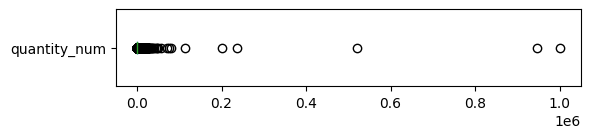

In [45]:
# Plotting boxplot of 'quantity_num'
data['quantity_num'].plot.box(vert=False);
plt.gcf().set_size_inches(6,1)

In [46]:
# Putting outliers to nan
data['quantity_num'] = data['quantity_num'].where(data['quantity_num'].between(0,10001))

In [47]:
# Preview
my_c = data.columns[data.columns.str.contains('serving')]
data[my_c][data[my_c].notna().any(axis=1)].sample(5)

,serving_size,serving_quantity
431677,NaN,57.0
193456,1 slice (19 g),19.0
781349,NaN,57.0
673451,NaN,57.0
164691,NaN,57.0


In [48]:
del data['serving_size']

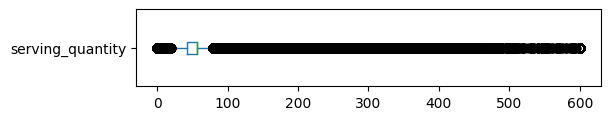

In [49]:
# Putting abnormal values to nan, checking distribution
data['serving_quantity'] = data['serving_quantity'].clip(0,600)
data['serving_quantity'].map({0:np.nan, 600:np.nan})
data['serving_quantity'].plot.box(vert=False);
plt.gcf().set_size_inches(6,1)

### 2.3 Category columns